In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/minhn/OneDrive/Personal Project/Mobile phone prediction/Mobile-Price-Prediction-cleaned_data.csv")
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [3]:
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


<Axes: >

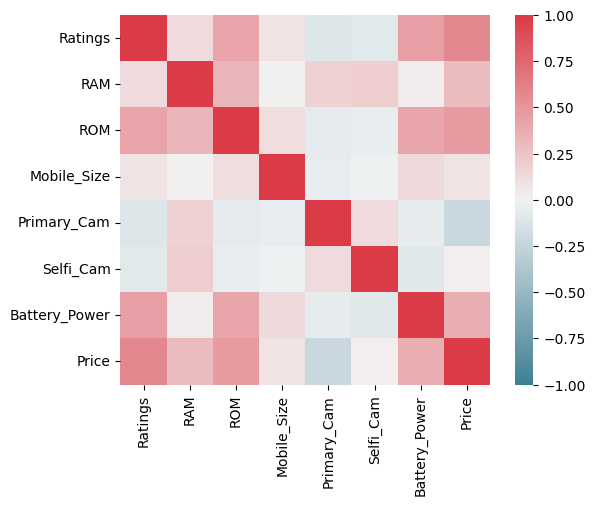

In [5]:
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True)

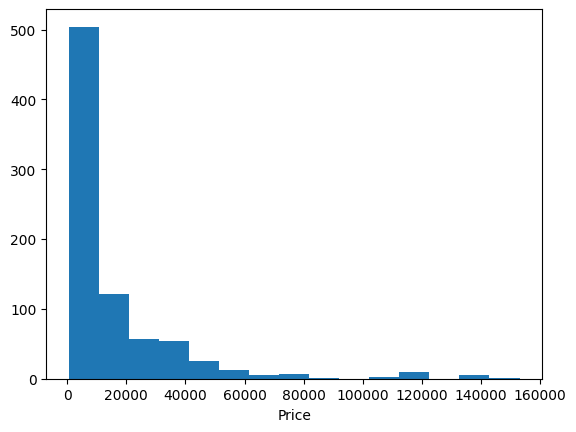

In [6]:
plt.hist(df['Price'],bins=15)
plt.xlabel("Price")
plt.show()

In [7]:
#Splitting data into train and test, with train_data accounts for 80% of the datasets 
from sklearn.model_selection import train_test_split 
y_data = df['Price'] 
x_data=df.drop('Price',axis=1) 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1) 

# Single linear regression

In [8]:
#Create the regression model
lm1 = LinearRegression()
lm1.fit(x_train,y_train)
Yhat1_train = lm1.predict(x_train)
Yhat1_test = lm1.predict(x_test)

Plot the distribution plot of Actual Values as well as Fitted Values

In [9]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Mobilephone')
    plt.legend([RedName, BlueName])
    plt.show()
    plt.close()

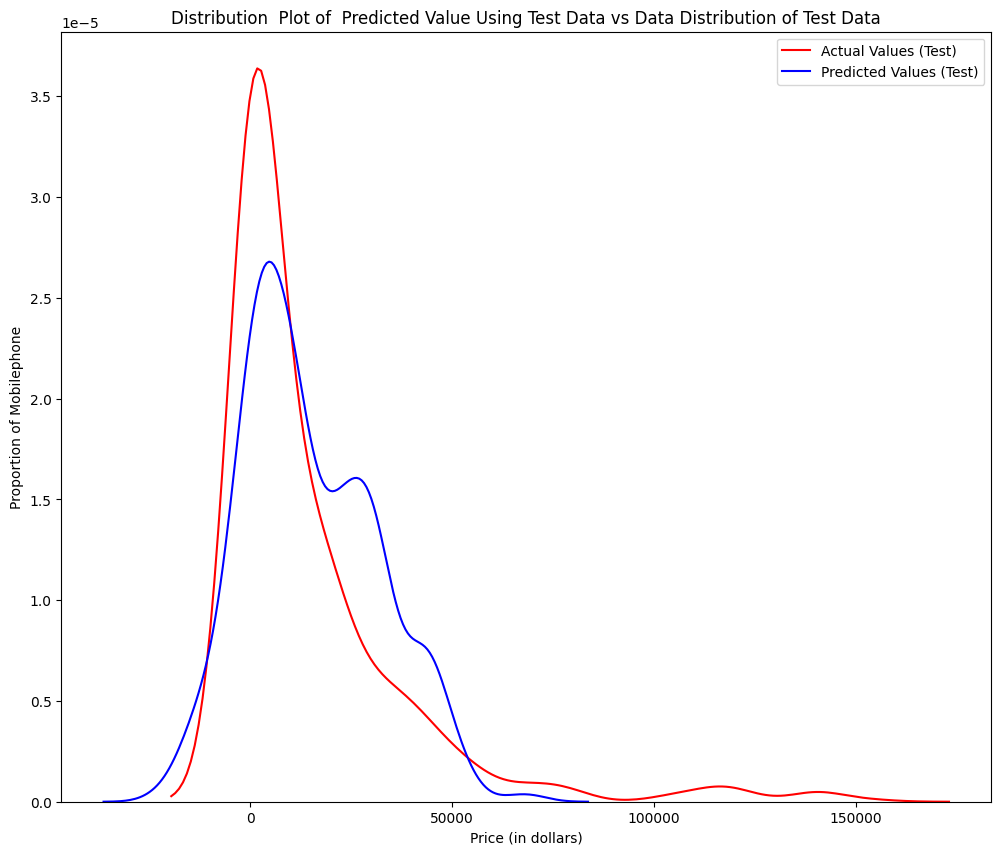

In [10]:
Title1='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_train,Yhat1_train,"Actual Values (Test)","Predicted Values (Test)",Title1)

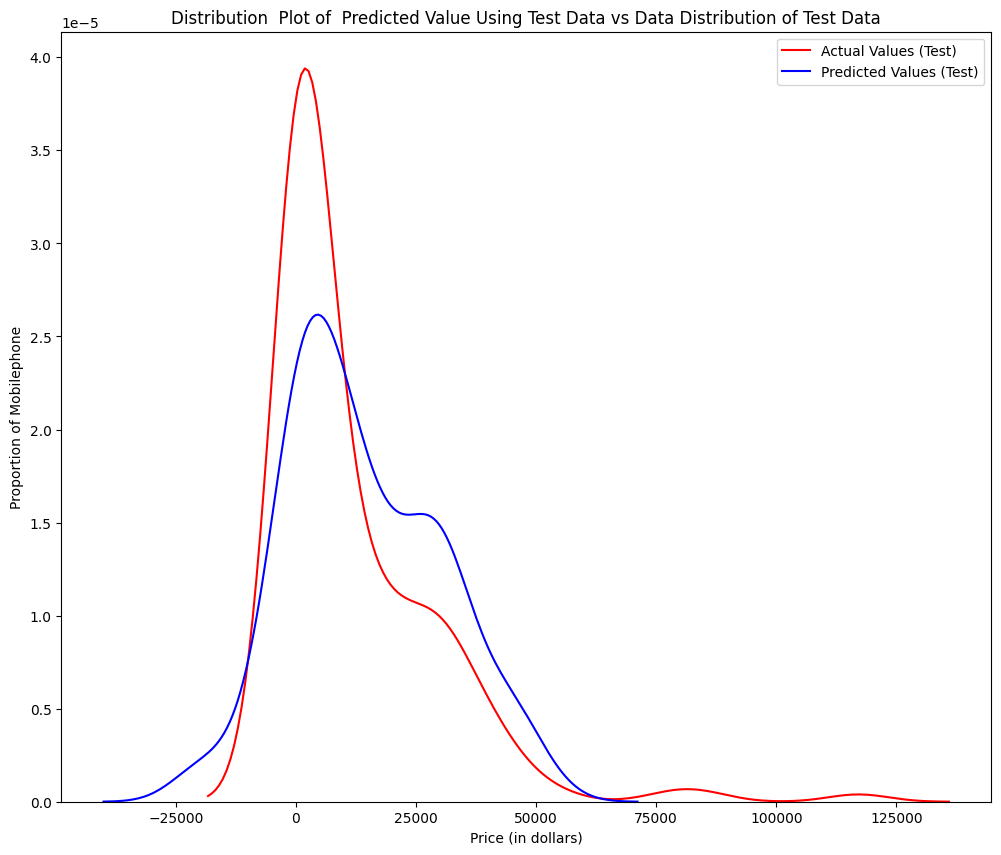

In [11]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,Yhat1_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [12]:
print('The R-Squared of Linear Regression model is:', lm1.score(x_train,y_train))
print('The Mean Squared Error is:', mean_squared_error(y_train,Yhat1_train))

The R-Squared of Linear Regression model is: 0.46073625874811885
The Mean Squared Error is: 317796663.0217923


In [13]:
print('The R-Squared of Linear Regression model is:', lm1.score(x_test,y_test))
print('The Mean Squared Error is:', mean_squared_error(y_test,Yhat1_test))

The R-Squared of Linear Regression model is: 0.4592130680020857
The Mean Squared Error is: 162367070.12065068


We use cross validation to improve the model

In [14]:
#Divide the model into 4 folds and print the mean value of R^2 score as well as the standard deviation
Rcross = cross_val_score(lm1, x_data, y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "\nThe standard deviation is" , Rcross.std())

The mean of the folds are 0.4425053628059966 
The standard deviation is 0.03315822923932438


Since these R^2 values above, we can conclude that the Linear Regression model does not work well with this datasets. We should try to use Polynomial model

In [ ]:
lm2 = LinearRegression()
Rsqu_test = []
q = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    for i in range(0,7,1):
        x_train_pr = pr.fit_transform(x_train.iloc[:,[i]])
        x_test_pr = pr.fit_transform(x_test.iloc[:,[i]])    
        lm2.fit(x_train_pr, y_train)
        Rsqu_test.append(lm2.score(x_test_pr, y_test))